# Logistic regression

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


## Read In & Understand Data
We will be looking at the Pima Indians Diabetes dataset that can be used to predict whether or not someone has diabetes based on a set of a predictors. Information about this dataset is provided [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/pima-indians-diabetes.csv"
!curl -s {url} | head | cut -c1-100


6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1


## Read in the data



Notice that the data set does not have column names.  So, we will create our own and include them when we create the data frame.


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv( url, header=None, names=col_names)


In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
pima['label'].value_counts( dropna = False)


,count
label,
0,500
1,268


In [10]:
X = pima.drop('label',axis=1).copy()
y = pima['label'].copy()

## EDA

### Correlation matrix plot

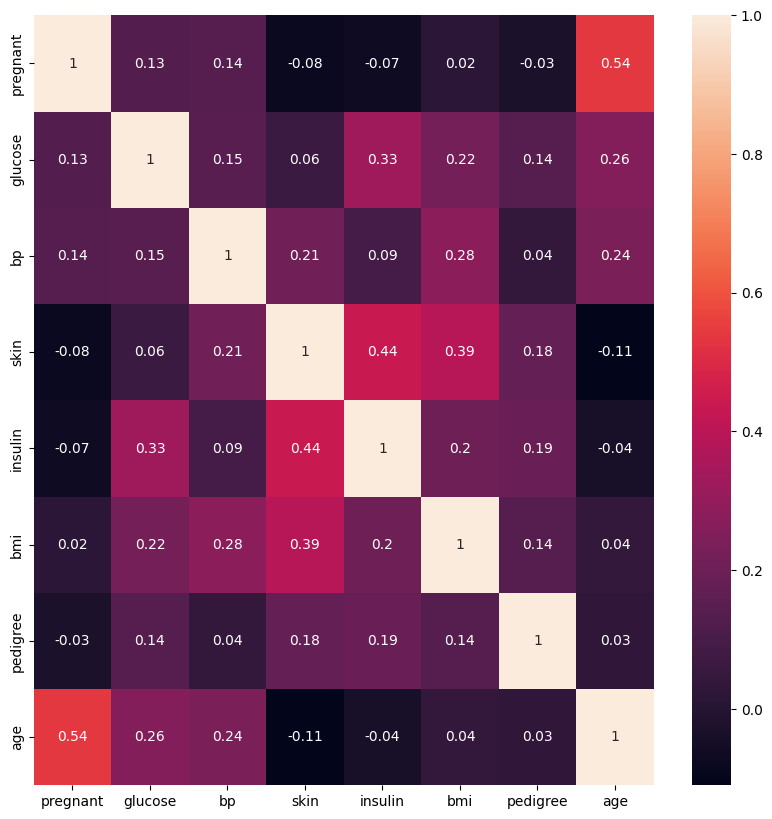

In [11]:
# Checking correlations between predictors
plt.figure(figsize=(10,10))
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


### Feature distributions

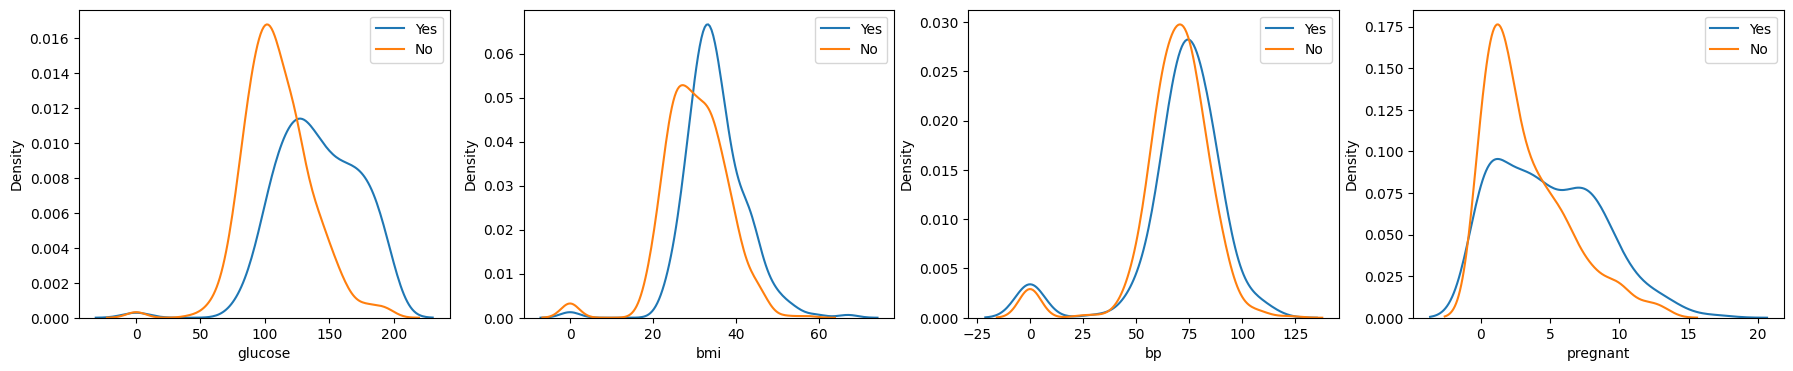

In [12]:
# Look at the distribution of a few predictors for different labels
predictors = ['glucose', 'bmi', 'bp', 'pregnant']

fig, axes = plt.subplots(1,4, figsize= (22,4))
for i,pred in enumerate(predictors):
  sns.kdeplot(pima[pred][y==1], label = 'Yes', ax = axes[i])
  sns.kdeplot(pima[pred][y==0], label = 'No', ax = axes[i])
  axes[i].legend()
plt.show()


## Fit Logistic Model

### Cross validation

In [13]:
numLoops = 50
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)

for idx in range(0,50):
  # Train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, test_size=0.2 )

  # Create model
  logreg = LogisticRegression( max_iter=1000 )

  # Fit ( train ) model
  logreg.fit( X_train, y_train )

  # Predict
  y_pred = logreg.predict( X_test )

  # Calculate and record performance metrics
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)

print(f"Mean Accuracy: {predict_accuracy.mean()*100:.1f}%")
print(f"F1 Score: {predict_f1.mean()*100:.1f}%")

Mean Accuracy: 77.1%
F1 Score: 63.2%


### Confusion matrix

<Figure size 800x800 with 0 Axes>

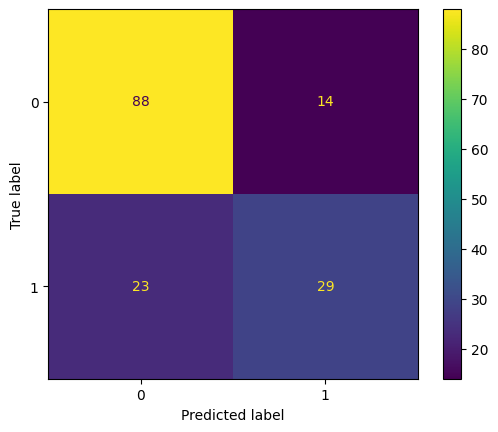

In [14]:
# Let's look at the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

We are often predicting that someone does not have diabetes even if they do. What can we do to combat this?

### Balance classes

In [15]:
# Let's balance our classes
pima_balanced = pima.groupby('label').sample(n = 268, replace = False)

In [16]:
pima_balanced['label'].value_counts( dropna = False)

,count
label,
0,268
1,268


In [17]:
X = pima_balanced.drop('label',axis=1).copy()
y = pima_balanced['label'].copy()

### Cross validation

In [18]:
numLoops = 50
predict_accuracy = np.zeros(numLoops)
predict_f1 = np.zeros(numLoops)
for idx in range(0,50):
  # Train/test split
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

  # Create model
  logreg = LogisticRegression(max_iter=1000)

  # Fit ( train ) model
  logreg.fit(X_train,y_train)

  # Predict
  y_pred = logreg.predict(X_test)

  # Calculate and record performance metrics
  predict_accuracy[idx] = metrics.accuracy_score(y_test,y_pred)
  predict_f1[idx] = metrics.f1_score(y_test,y_pred)

print(f"Mean Accuracy: {predict_accuracy.mean()*100:.1f}%")
print(f"F1 Score: {predict_f1.mean()*100:.1f}%")

Mean Accuracy: 73.0%
F1 Score: 72.4%


### Confusion matrix

Let's look at the confusion matrix using the last validation run


<Figure size 800x800 with 0 Axes>

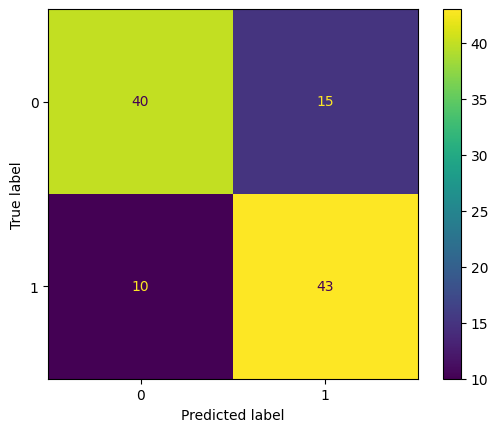

In [19]:
cm = confusion_matrix( y_test, y_pred )
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay( confusion_matrix = cm )
disp.plot()
plt.show()


How does it make its classifications?

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
print(y_pred_proba[0:15]*100)

[79.7395133  14.12946147 78.42417237 12.75827696 67.83156477 74.66661396
 10.37109708 77.98437815 30.67691622  3.54989808 17.86116108 61.94939787
 16.10489783 73.53332699 26.67897117]


Pair up preditions with probabilities.  The default threshold is 50%.

In [21]:
sorted( zip( y_pred, y_pred_proba[0:15]*100))


[(0, 3.549898079853037),
 (0, 10.371097083682104),
 (0, 12.758276956019602),
 (0, 14.129461474620319),
 (0, 16.104897828275476),
 (0, 17.861161081035775),
 (0, 26.67897117222632),
 (0, 30.676916223981237),
 (1, 61.949397865264444),
 (1, 67.8315647668529),
 (1, 73.53332698841315),
 (1, 74.66661396200173),
 (1, 77.98437815009453),
 (1, 78.42417237272544),
 (1, 79.73951330022297)]

## ROC-AUC



A receiver operating characteristic ( ROC ) and area under the curve ( AUC ) plot illustrates the performance of a binary classifier model at varying threshold values.  It also enables us to pick an optimal threshold for classification.






### Compute ROC curve and AUC


In [22]:
fpr, tpr, thresholds = roc_curve( y_test, y_pred_proba )
roc_auc = auc(fpr, tpr)


In [23]:
roc_auc

0.8205831903945111

### Plot ROC curve


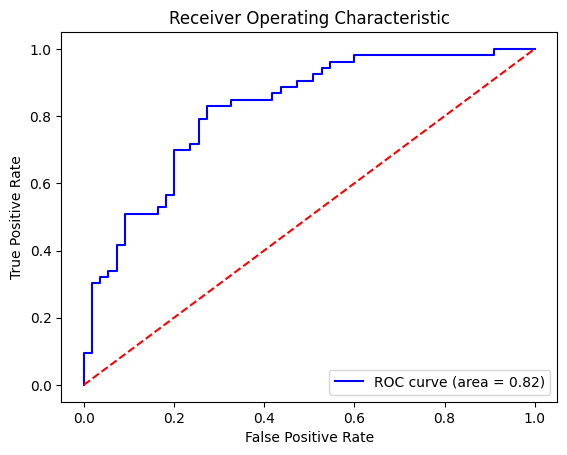

In [24]:
plt.figure()
plt.plot(
  fpr,
  tpr,
  color = 'blue',
  label = f'ROC curve (area = {roc_auc:.2f})',
)
plt.plot(
  [0, 1],
  [0, 1],
  color='red',
  linestyle='--',
)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [25]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)  # Point closest to top-left corner
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal threshold: {optimal_threshold}')


Optimal threshold: 0.48485849086520916


### Calculate predictions usin ROC-AUC threshold


In [33]:
y_pred = ( y_pred_proba >= optimal_threshold ).astype(int)
y_pred = ( y_pred_proba >= .3 ).astype(int)

y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Confusion matrix

<Figure size 800x800 with 0 Axes>

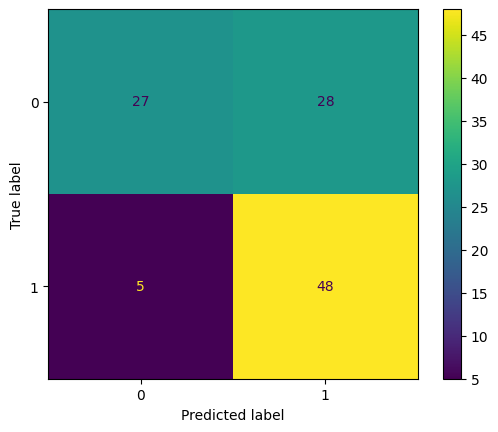

In [34]:
# Let's look at the confusion matrix
cm = confusion_matrix( y_test, y_pred )
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay( confusion_matrix = cm )
disp.plot()
plt.show()


### Calculate performance metrics

In [28]:
predict_accuracy = metrics.accuracy_score( y_test, y_pred )
predict_f1 = metrics.f1_score( y_test, y_pred )

print(f"Mean Accuracy: {predict_accuracy*100:.1f}%")
print(f"F1 Score: {predict_f1*100:.1f}%")

Mean Accuracy: 77.8%
F1 Score: 78.6%


## References

- [ROC-AUC]( https://en.wikipedia.org/wiki/Receiver_operating_characteristic )